In [1]:
#importing project libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#importing the dataset
df_movies=pd.read_csv(r'C:\Users\HP\Desktop\python\100-pandas-puzzles-master\100-pandas-puzzles-master\tmdb-movies.csv')
df_movies.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
df_movies.info()

<class 'pandas.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  str    
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  str    
 6   cast                  10790 non-null  str    
 7   homepage              2936 non-null   str    
 8   director              10822 non-null  str    
 9   tagline               8042 non-null   str    
 10  keywords              9373 non-null   str    
 11  overview              10862 non-null  str    
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  str    
 14  production_companies  9836 non-null   str    
 15  release_date          10866 no

In [4]:
#viewing the column names
df_movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='str')

In [5]:
#removing unwanted columns which are homepage, tagline, release_year
df_movies.drop(columns=['homepage','release_year','tagline','overview','keywords'],inplace=True)

In [6]:
#cehcking and dealing with null columns
df_movies.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
#viewing the shape of the dataset
df_movies.shape

(10866, 16)

In [8]:
#dropping rows if it has any single null value
df_movies.dropna(axis=0,inplace=True)
df_movies.shape

(9771, 16)

In [9]:
#viewing the duplicated values
df_movies.duplicated().sum()

np.int64(1)

In [10]:
#dropping the duplicated values
df_movies.drop_duplicates(inplace=True)

# confirm whether we still have duplicates
df_movies.duplicated().sum().any()

np.False_

In [11]:
#deriving the target(profit) dataset
df_movies['profit']=df_movies['revenue_adj'].sub(df_movies['budget_adj'])

#viewing the dataset
df_movies.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,1.012000e+08,2.716190e+08,1.704191e+08


In [12]:
#drop budget,revenue_adj,revenue columns
df_movies.drop(columns=['budget','revenue_adj','revenue'],inplace=True)

In [13]:
df_movies.info()

<class 'pandas.DataFrame'>
Index: 9770 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9770 non-null   int64  
 1   imdb_id               9770 non-null   str    
 2   popularity            9770 non-null   float64
 3   original_title        9770 non-null   str    
 4   cast                  9770 non-null   str    
 5   director              9770 non-null   str    
 6   runtime               9770 non-null   int64  
 7   genres                9770 non-null   str    
 8   production_companies  9770 non-null   str    
 9   release_date          9770 non-null   str    
 10  vote_count            9770 non-null   int64  
 11  vote_average          9770 non-null   float64
 12  budget_adj            9770 non-null   float64
 13  profit                9770 non-null   float64
dtypes: float64(4), int64(3), str(7)
memory usage: 1.1 MB


adding profit column

In [14]:
#making the values in both revenue_adj,budget_adj integers
df_movies[['budget_adj','profit']]=df_movies[['profit','budget_adj']].astype(int)

In [15]:
#checking datatypes of each column
df_movies.info()

<class 'pandas.DataFrame'>
Index: 9770 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9770 non-null   int64  
 1   imdb_id               9770 non-null   str    
 2   popularity            9770 non-null   float64
 3   original_title        9770 non-null   str    
 4   cast                  9770 non-null   str    
 5   director              9770 non-null   str    
 6   runtime               9770 non-null   int64  
 7   genres                9770 non-null   str    
 8   production_companies  9770 non-null   str    
 9   release_date          9770 non-null   str    
 10  vote_count            9770 non-null   int64  
 11  vote_average          9770 non-null   float64
 12  budget_adj            9770 non-null   int64  
 13  profit                9770 non-null   int64  
dtypes: float64(2), int64(5), str(7)
memory usage: 1.1 MB


In [16]:
#converting release datae data type to datetime
df_movies['release_date']=pd.to_datetime(df_movies['release_date'])

#viewing the dataset info again
df_movies.info()

C:\Users\HP\AppData\Local\Temp\ipykernel_7092\3232704028.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_movies['release_date']=pd.to_datetime(df_movies['release_date'])


<class 'pandas.DataFrame'>
Index: 9770 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9770 non-null   int64         
 1   imdb_id               9770 non-null   str           
 2   popularity            9770 non-null   float64       
 3   original_title        9770 non-null   str           
 4   cast                  9770 non-null   str           
 5   director              9770 non-null   str           
 6   runtime               9770 non-null   int64         
 7   genres                9770 non-null   str           
 8   production_companies  9770 non-null   str           
 9   release_date          9770 non-null   datetime64[us]
 10  vote_count            9770 non-null   int64         
 11  vote_average          9770 non-null   float64       
 12  budget_adj            9770 non-null   int64         
 13  profit                9770 non-nu

In [17]:
##extrating & adding new columns for day and month names from release date
df_movies['release_day']=df_movies['release_date'].dt.day_name
df_movies['release_month']=df_movies['release_date'].dt.month_name

#viewing the dataset
df_movies.head(2)

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,profit,release_day,release_month
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,1254445953,137999939,<bound method DatetimeArray.day_name of <panda...,<bound method DatetimeArray.month_name of <pan...
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,210161353,137999939,<bound method DatetimeArray.day_name of <panda...,<bound method DatetimeArray.month_name of <pan...


In [18]:
#drop relase date
df_movies.drop(columns='release_date',inplace=True)

#viewing the datset
df_movies.head(3)

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,budget_adj,profit,release_day,release_month
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,1254445953,137999939,<bound method DatetimeArray.day_name of <panda...,<bound method DatetimeArray.month_name of <pan...
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,210161353,137999939,<bound method DatetimeArray.day_name of <panda...,<bound method DatetimeArray.month_name of <pan...
2,262500,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,170419069,101199955,<bound method DatetimeArray.day_name of <panda...,<bound method DatetimeArray.month_name of <pan...


In [19]:
#check which unique id column corresponds to the total number of samples
print(df_movies['id'].nunique()==df_movies.shape[0])
print(df_movies['imdb_id'].nunique()==df_movies.shape[0])

True
True


In [20]:
#drop imdb columns from dataset since id & imdb data corresponds to same records

df_movies.drop(columns='imdb_id',inplace=True)

#viewing the dataset
df_movies.head(3)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,budget_adj,profit,release_day,release_month
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,1254445953,137999939,<bound method DatetimeArray.day_name of <panda...,<bound method DatetimeArray.month_name of <pan...
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,210161353,137999939,<bound method DatetimeArray.day_name of <panda...,<bound method DatetimeArray.month_name of <pan...
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,170419069,101199955,<bound method DatetimeArray.day_name of <panda...,<bound method DatetimeArray.month_name of <pan...


In [21]:
#making copy of the dataset df_movies
df_movies_cast=df_movies.copy()

df_movies_cast.head(2)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,budget_adj,profit,release_day,release_month
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,1254445953,137999939,<bound method DatetimeArray.day_name of <panda...,<bound method DatetimeArray.month_name of <pan...
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,210161353,137999939,<bound method DatetimeArray.day_name of <panda...,<bound method DatetimeArray.month_name of <pan...


In [22]:
#chechking the value_counts of the cast features
print(df_movies_cast.cast.value_counts())

print(df_movies_cast.cast.nunique()==len(df_movies_cast.cast.value_counts()))

cast
William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei                     5
Louis C.K.                                                                                  4
Jennifer Lawrence|Josh Hutcherson|Liam Hemsworth|Woody Harrelson|Elizabeth Banks            3
Jim Jefferies                                                                               3
Pierre Coffin                                                                               3
                                                                                           ..
Michael Hynson|Robert August|Lord 'Tally Ho' Blears|Bruce Brown|Chip Fitzwater              1
James Garner|Eva Marie Saint|Yves Montand|ToshirÅ Mifune|Brian Bedford                      1
Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Zhzhyonov|Olga Aroseva|Lyubov Dobrzhanskaya    1
Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|John Sebastian|Tadao Nakamaru                    1
Harold P. Warren|Tom Neyman|John Reynolds|Diane Mahree|

In [23]:
##seperating hybrid casted movies
df_movies_cast_hybrid=df_movies_cast[df_movies_cast.cast.str.split('|').str.len()>1]

#droping the hybrid casted movies from the dataset df_movies_cast
df_movies_cast_single=df_movies_cast.drop(df_movies_cast_hybrid.index)

df_movies_cast_hybrid.shape, df_movies_cast_single.shape

((9686, 14), (84, 14))

In [24]:
df_movies_cast.columns

Index(['id', 'popularity', 'original_title', 'cast', 'director', 'runtime',
       'genres', 'production_companies', 'vote_count', 'vote_average',
       'budget_adj', 'profit', 'release_day', 'release_month'],
      dtype='str')

In [25]:
#define a function
def explode (df, lst_cols,fill_value='', preserve_index=False):
    if (lst_cols is not None
        and len(lst_cols)>0
        and not isinstance(lst_cols,(list,tuple,np.ndarray,pd.series))):
        lst_cols =[lst_cols]
    #all olumn expect lst_cols
    idx_cols=df.columns.difference(lst_cols)

    #calculating length of lists
    lens=df[lst_cols[0]].str.len()

    #preserve original index values
    idx=np.repeat(df.index.values,lens)

    #create explodede df
    res=(pd.DataFrame({
            col:np.repeat(df[col].values,lens)
            for col in idx_cols},
            index=idx)
        .assign(**{col:np.concatenate(df.loc[lens>0,col].values)
                   for col in lst_cols}))
    
    #append those rows that have empty lists
    if (lens ==0).any() :

        #r at least one list in cells is empty
        res= (res.append(df.loc[lens==0,idx_cols], sort=False)
              .fillna(fill_value))
        
    #revert the original index order
    res=res.sort_index()

    #reset index if requested
    if not preserve_index:
        res=res.reset_index(drop=True)
    return res
    

In [26]:
# separating the cast column for all movies
df_movies_cast_comb = df_movies_cast.assign(
    cast=df_movies_cast['cast'].str.split('|')
).explode('cast')

# separating the cast column only for hybrid casted movies
df_movies_cast_hybrid_sep = df_movies_cast_hybrid.assign(
    cast=df_movies_cast_hybrid['cast'].str.split('|')
).explode('cast')

# viewing the shape
df_movies_cast_comb.shape, df_movies_cast_hybrid_sep.shape

((48010, 14), (47926, 14))

In [27]:
#viewing the column names
df_movies_cast_comb.columns

Index(['id', 'popularity', 'original_title', 'cast', 'director', 'runtime',
       'genres', 'production_companies', 'vote_count', 'vote_average',
       'budget_adj', 'profit', 'release_day', 'release_month'],
      dtype='str')

In [28]:
#reaaranging the columns

df_movies_cast_comb= df_movies_cast_comb.reindex(columns=['id',
                                                          'original_title'
                                                          ,'production_companies'
                                                          ,'genres'
                                                          ,'director'
                                                          ,'cast'
                                                          ,'release_month'
                                                          ,'release_day'
                                                          ,'runtime'
                                                          ,'budget_adj'
                                                          ,'profit_adj'
                                                          ,'vote_average'
                                                          ,'vote_count'
                                                          ,'popularity'])

df_movies_cast_hybrid_sep= df_movies_cast_hybrid_sep.reindex(columns=['id',
                                                          'original_title'
                                                          ,'production_companies'
                                                          ,'genres'
                                                          ,'director'
                                                          ,'cast'
                                                          ,'release_month'
                                                          ,'release_day'
                                                          ,'runtime'
                                                          ,'budget_adj'
                                                          ,'profit_adj'
                                                          ,'vote_average'
                                                          ,'vote_count'
                                                          ,'popularity'])

df_movies_cast_comb.head(3)
df_movies_cast_hybrid_sep.head(3)

,id,original_title,production_companies,genres,director,cast,release_month,release_day,runtime,budget_adj,profit_adj,vote_average,vote_count,popularity
0,135397,Jurassic World,Universal Studios|Amblin Entertainment|Legenda...,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,Chris Pratt,<bound method DatetimeArray.month_name of <pan...,<bound method DatetimeArray.day_name of <panda...,124,1254445953,NaN,6.5,5562,32.985763
0,135397,Jurassic World,Universal Studios|Amblin Entertainment|Legenda...,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,Bryce Dallas Howard,<bound method DatetimeArray.month_name of <pan...,<bound method DatetimeArray.day_name of <panda...,124,1254445953,NaN,6.5,5562,32.985763
0,135397,Jurassic World,Universal Studios|Amblin Entertainment|Legenda...,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,Irrfan Khan,<bound method DatetimeArray.month_name of <pan...,<bound method DatetimeArray.day_name of <panda...,124,1254445953,NaN,6.5,5562,32.985763


In [29]:
# making copy of initial dataframe for genres
df_movies_genres=df_movies.copy()


In [30]:
# seperating df_movie_genres by hybrid
df_movies_genres_hybrid = df_movies_genres[df_movies_genres['genres'].str.split('|').str.len()>1]


df_movies_genres_hybrid.shape

(7811, 14)

In [31]:
#viewing th enumber unique values for genres olumn

df_movies_genres_hybrid.genres.nunique()

##checking if the total sample in the df_movies matches the
# sample in df_movies_genres_hybrid

df_movies.shape[0] == df_movies_genres_hybrid.shape[0] 

False

In [32]:
# dropping th ehybrid genres from the df_movies_genres
df_movies_genres_single= df_movies_genres.drop(df_movies_genres_hybrid.index)

#chcking th shape of th data frame
df_movies_genres_single.shape

(1959, 14)

In [33]:
#viewing the dataframe
df_movies_genres_single.head(2)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,budget_adj,profit,release_day,release_month
25,177677,4.566713,Mission: Impossible - Rogue Nation,Tom Cruise|Jeremy Renner|Simon Pegg|Rebecca Fe...,Christopher McQuarrie,131,Action,Paramount Pictures|Skydance Productions|China ...,2349,7.1,489743512,137999939,<bound method DatetimeArray.day_name of <panda...,<bound method DatetimeArray.month_name of <pan...
26,214756,4.564549,Ted 2,Mark Wahlberg|Seth MacFarlane|Amanda Seyfried|...,Seth MacFarlane,115,Comedy,Universal Pictures|Media Rights Capital|Fuzzy ...,1666,6.3,136034457,62559972,<bound method DatetimeArray.day_name of <panda...,<bound method DatetimeArray.month_name of <pan...


In [34]:
  ## checking the value count of genres feature
  df_movies_genres.genres.value_counts()

genres
Drama                                       638
Comedy                                      615
Drama|Romance                               272
Comedy|Drama                                255
Comedy|Romance                              248
                                           ... 
Adventure|Drama|War|History|Action            1
Adventure|Comedy|Fantasy|Science Fiction      1
Adventure|Drama|Action|Family|Foreign         1
Comedy|Family|Mystery|Romance                 1
Mystery|Science Fiction|Thriller|Drama        1
Name: count, Length: 1916, dtype: int64

In [35]:
# separating the genres column for all movies
df_movies_genres_comb = df_movies_genres.assign(
    genres=df_movies_genres['genres'].str.split('|')
).explode('genres')

# separating the genres column only for hybrid genres column
df_movies_genres_hybrid_sep = df_movies_genres_hybrid.assign(
    genres=df_movies_genres_hybrid['genres'].str.split('|')
).explode('genres')

# viewing the shape
df_movies_genres_comb.shape, df_movies_genres_hybrid_sep.shape

((24643, 14), (22684, 14))

In [36]:
#reaaranging the columns

df_movies_genres_comb= df_movies_genres_comb.reindex(columns=['id',
                                                          'original_title'
                                                          ,'production_companies'
                                                          ,'genres'
                                                          ,'director'
                                                          ,'cast'
                                                          ,'release_month'
                                                          ,'release_day'
                                                          ,'runtime'
                                                          ,'budget_adj'
                                                          ,'profit_adj'
                                                          ,'vote_average'
                                                          ,'vote_count'
                                                          ,'popularity'])

df_movies_genres_hybrid_sep= df_movies_genres_hybrid_sep.reindex(columns=['id',
                                                          'original_title'
                                                          ,'production_companies'
                                                          ,'genres'
                                                          ,'director'
                                                          ,'cast'
                                                          ,'release_month'
                                                          ,'release_day'
                                                          ,'runtime'
                                                          ,'budget_adj'
                                                          ,'profit_adj'
                                                          ,'vote_average'
                                                          ,'vote_count'
                                                          ,'popularity'])

df_movies_genres_comb.head(3)
df_movies_genres_hybrid_sep.head(3)

,id,original_title,production_companies,genres,director,cast,release_month,release_day,runtime,budget_adj,profit_adj,vote_average,vote_count,popularity
0,135397,Jurassic World,Universal Studios|Amblin Entertainment|Legenda...,Action,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,<bound method DatetimeArray.month_name of <pan...,<bound method DatetimeArray.day_name of <panda...,124,1254445953,NaN,6.5,5562,32.985763
0,135397,Jurassic World,Universal Studios|Amblin Entertainment|Legenda...,Adventure,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,<bound method DatetimeArray.month_name of <pan...,<bound method DatetimeArray.day_name of <panda...,124,1254445953,NaN,6.5,5562,32.985763
0,135397,Jurassic World,Universal Studios|Amblin Entertainment|Legenda...,Science Fiction,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,<bound method DatetimeArray.month_name of <pan...,<bound method DatetimeArray.day_name of <panda...,124,1254445953,NaN,6.5,5562,32.985763


production company columns



In [37]:
#making the initial copy of dataframe for production company
df_movies_prod=df_movies.copy()

In [38]:
#seperating df_movies_prod by hybrid 
df_movies_prod_hybrid = df_movies_prod[df_movies_prod['production_companies'].str.split('|').str.len()>1]


df_movies_prod_hybrid.head(3)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,budget_adj,profit,release_day,release_month
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,1254445953,137999939,<bound method DatetimeArray.day_name of <panda...,<bound method DatetimeArray.month_name of <pan...
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,210161353,137999939,<bound method DatetimeArray.day_name of <panda...,<bound method DatetimeArray.month_name of <pan...
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,170419069,101199955,<bound method DatetimeArray.day_name of <panda...,<bound method DatetimeArray.month_name of <pan...


In [39]:
#chechking if the total samples in the df_movies matches with the smaple in df_movies_prod_hybrid
df_movies_prod_single=df_movies_prod.drop(df_movies_prod_hybrid.index)

#viewing the shape of the dataframe
df_movies_prod_single.shape

(3385, 14)

In [40]:
#viewing the dataset
df_movies_prod_single.head(3)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,budget_adj,profit,release_day,release_month
17,102899,5.573184,Ant-Man,Paul Rudd|Michael Douglas|Evangeline Lilly|Cor...,Peyton Reed,115,Science Fiction|Action|Adventure,Marvel Studios,3779,7.0,357513832,119599947,<bound method DatetimeArray.day_name of <panda...,<bound method DatetimeArray.month_name of <pan...
47,286565,2.968254,Paper Towns,Nat Wolff|Cara Delevingne|Halston Sage|Justice...,Jake Schreier,109,Drama|Mystery|Romance,Fox 2000 Pictures,1252,6.2,67631286,11039995,<bound method DatetimeArray.day_name of <panda...,<bound method DatetimeArray.month_name of <pan...
72,284289,2.272044,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,95,Thriller,Furthur Films,81,5.5,42223,0,<bound method DatetimeArray.day_name of <panda...,<bound method DatetimeArray.month_name of <pan...


In [41]:
#chechking the value count of the movie_production feature
df_movies_prod.production_companies.value_counts()

production_companies
Paramount Pictures                                                   156
Universal Pictures                                                   133
Warner Bros.                                                          84
Walt Disney Pictures                                                  75
Metro-Goldwyn-Mayer (MGM)                                             72
                                                                    ... 
Peter Rogers Productions|Anglo-Amalgamated Film Distributors           1
Bruce Brown Films                                                      1
Cherokee Productions|Joel Productions|Douglas & Lewis Productions      1
Benedict Pictures Corp.                                                1
Norm-Iris                                                              1
Name: count, Length: 7406, dtype: int64

In [42]:
df_movies_prod.production_companies.nunique() == len(df_movies_prod.production_companies.value_counts())

True

In [43]:
# separating the production column for all movies
df_movies_prod_comb = df_movies_prod.assign(
    production_companies=df_movies_prod['production_companies'].str.split('|')
).explode('production_companies')

# separating the production column only for hybrid production column
df_movies_prod_hybrid_sep = df_movies_prod_hybrid.assign(
    production_companies=df_movies_prod_hybrid['production_companies'].str.split('|')
).explode('production_companies')

# viewing the shape
df_movies_prod_comb.shape, df_movies_prod_hybrid_sep.shape

((23141, 14), (19756, 14))

In [44]:
#reaaranging the columns

df_movies_prod_comb= df_movies_prod_comb.reindex(columns=['id',
                                                          'original_title'
                                                          ,'production_companies'
                                                          ,'genres'
                                                          ,'director'
                                                          ,'cast'
                                                          ,'release_month'
                                                          ,'release_day'
                                                          ,'runtime'
                                                          ,'budget_adj'
                                                          ,'profit_adj'
                                                          ,'vote_average'
                                                          ,'vote_count'
                                                          ,'popularity'])

df_movies_prod_hybrid_sep= df_movies_prod_hybrid_sep.reindex(columns=['id',
                                                          'original_title'
                                                          ,'production_companies'
                                                          ,'genres'
                                                          ,'director'
                                                          ,'cast'
                                                          ,'release_month'
                                                          ,'release_day'
                                                          ,'runtime'
                                                          ,'budget_adj'
                                                          ,'profit_adj'
                                                          ,'vote_average'
                                                          ,'vote_count'
                                                          ,'popularity'])

df_movies_prod_comb.head(3)
df_movies_prod_hybrid_sep.head(3)

,id,original_title,production_companies,genres,director,cast,release_month,release_day,runtime,budget_adj,profit_adj,vote_average,vote_count,popularity
0,135397,Jurassic World,Universal Studios,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,<bound method DatetimeArray.month_name of <pan...,<bound method DatetimeArray.day_name of <panda...,124,1254445953,NaN,6.5,5562,32.985763
0,135397,Jurassic World,Amblin Entertainment,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,<bound method DatetimeArray.month_name of <pan...,<bound method DatetimeArray.day_name of <panda...,124,1254445953,NaN,6.5,5562,32.985763
0,135397,Jurassic World,Legendary Pictures,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,<bound method DatetimeArray.month_name of <pan...,<bound method DatetimeArray.day_name of <panda...,124,1254445953,NaN,6.5,5562,32.985763


In [45]:
df_movies.describe()

,id,popularity,runtime,vote_count,vote_average,budget_adj,profit
count,9770.000000,9770.000000,9770.000000,9770.000000,9770.000000,9.770000e+03,9.770000e+03
mean,63190.584033,0.694775,102.939611,239.353224,5.963388,3.764481e+07,1.941996e+07
std,90725.204030,1.037027,27.865500,603.066348,0.913207,1.314880e+08,3.566891e+07
min,5.000000,0.000188,0.000000,10.000000,1.500000,-4.139124e+08,0.000000e+00
25%,10220.500000,0.232620,90.000000,18.000000,5.400000,0.000000e+00,0.000000e+00
50%,18677.500000,0.419762,100.000000,46.000000,6.000000,0.000000e+00,3.179625e+05
75%,70541.750000,0.776465,112.000000,173.000000,6.600000,2.031516e+07,2.467646e+07
max,417859.000000,32.985763,877.000000,9767.000000,8.700000,2.750137e+09,4.250000e+08


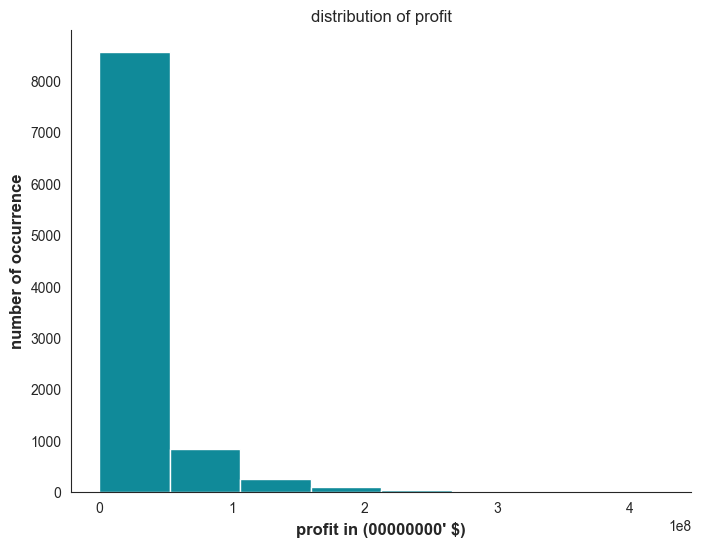

In [46]:
# visualizing the data distribution for profit
plt.figure(figsize=(8,6))
sns.set_style('white')

plt.hist(df_movies['profit'],
         bins=8,
         color='#108A99')

plt.xlabel("profit in (00000000' $)",
           fontsize=12,
           weight='bold')

plt.ylabel("number of occurrence",
           fontsize=12,
           weight='bold')

plt.title("distribution of profit")
sns.despine()

plt.show()

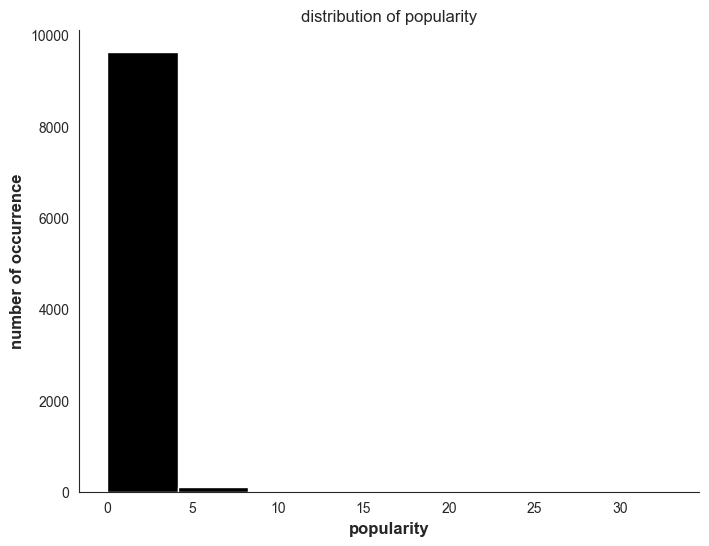

In [47]:
# visualizing the data distribution for popularity
plt.figure(figsize=(8,6))
sns.set_style('white')

plt.hist(df_movies['popularity'],
         bins=8,
         color='black')

plt.xlabel("popularity",
           fontsize=12,
           weight='bold')

plt.ylabel("number of occurrence",
           fontsize=12,
           weight='bold')

plt.title("distribution of popularity")
sns.despine()

plt.show()

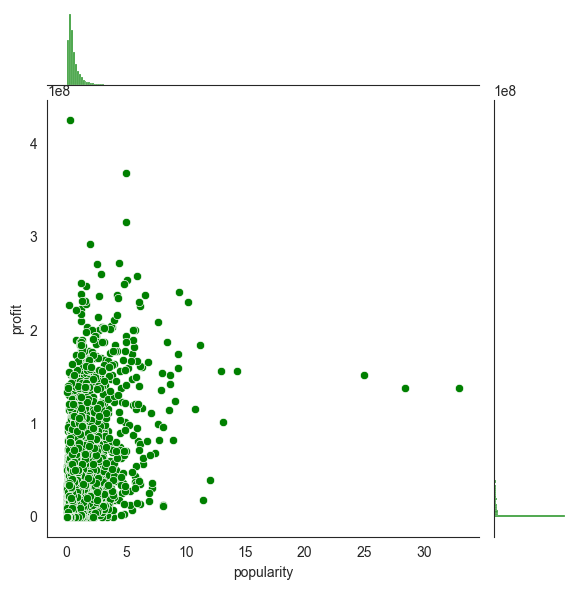

In [48]:
#visualizing the relationship through jointplot
#plot popularity column
#against profit_adj column

sns.jointplot(
    x='popularity',
    y='profit',
    data=df_movies,
    color='green'
)

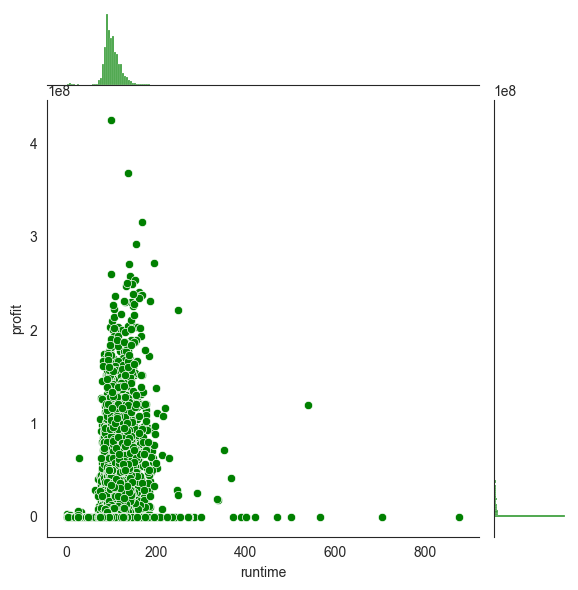

In [49]:
#plot runtime column
#against profit column
sns.jointplot(
    x='runtime',
    y='profit',
    data=df_movies,
    color='green'
)

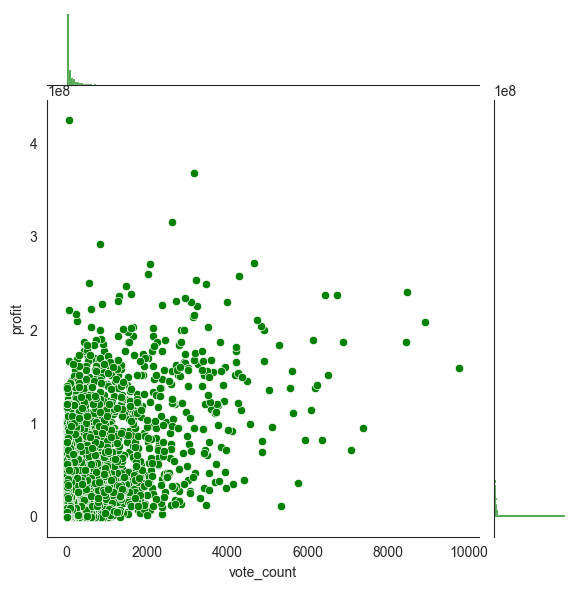

In [50]:
#plot vote_count column
#against profit column
sns.jointplot(
    x='vote_count',
    y='profit',
    data=df_movies,
    color='green'
)

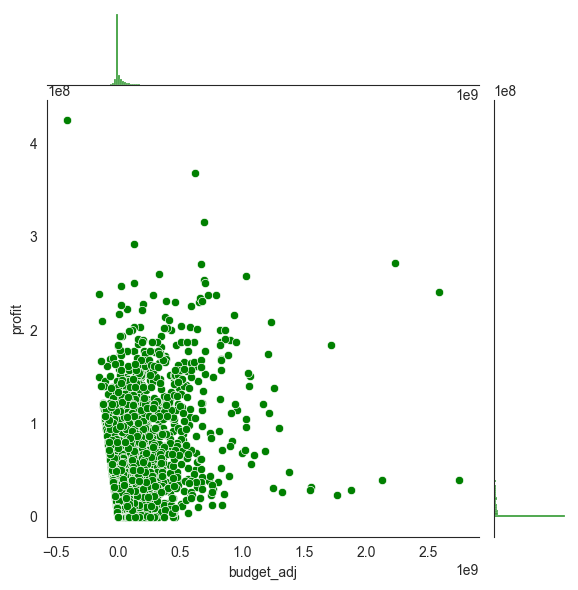

In [51]:
#plot budject_Adj column
#against profit column
sns.jointplot(
    x='budget_adj',
    y='profit',
    data=df_movies,
    color='green'
)

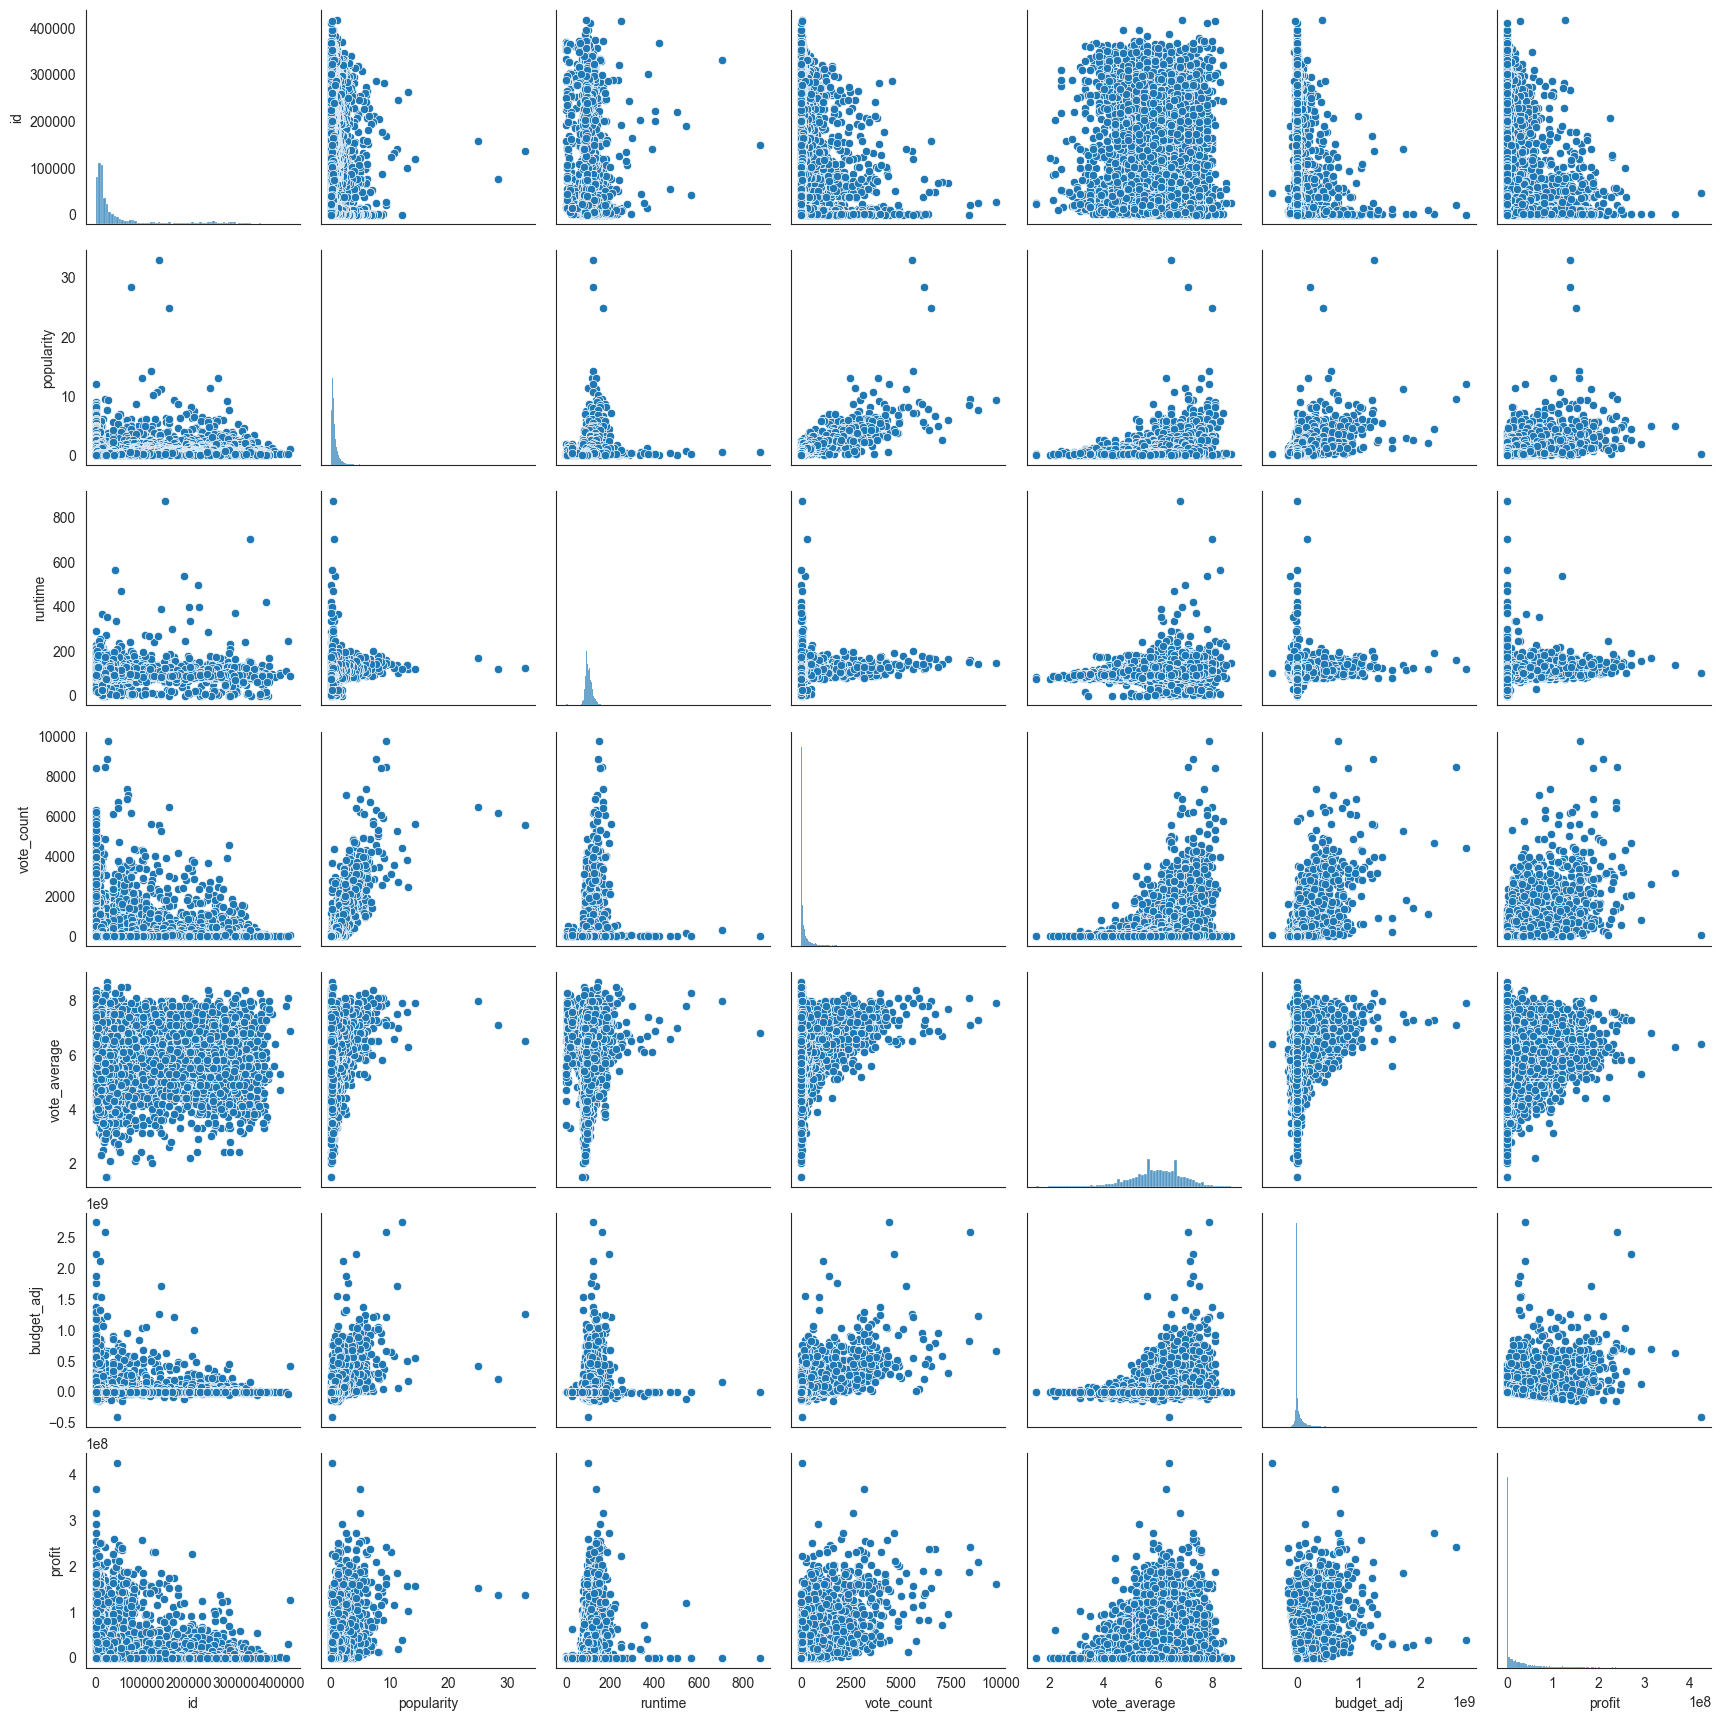

In [52]:
#visualizing through pair plot for all the numerical variables
sns.pairplot(df_movies)

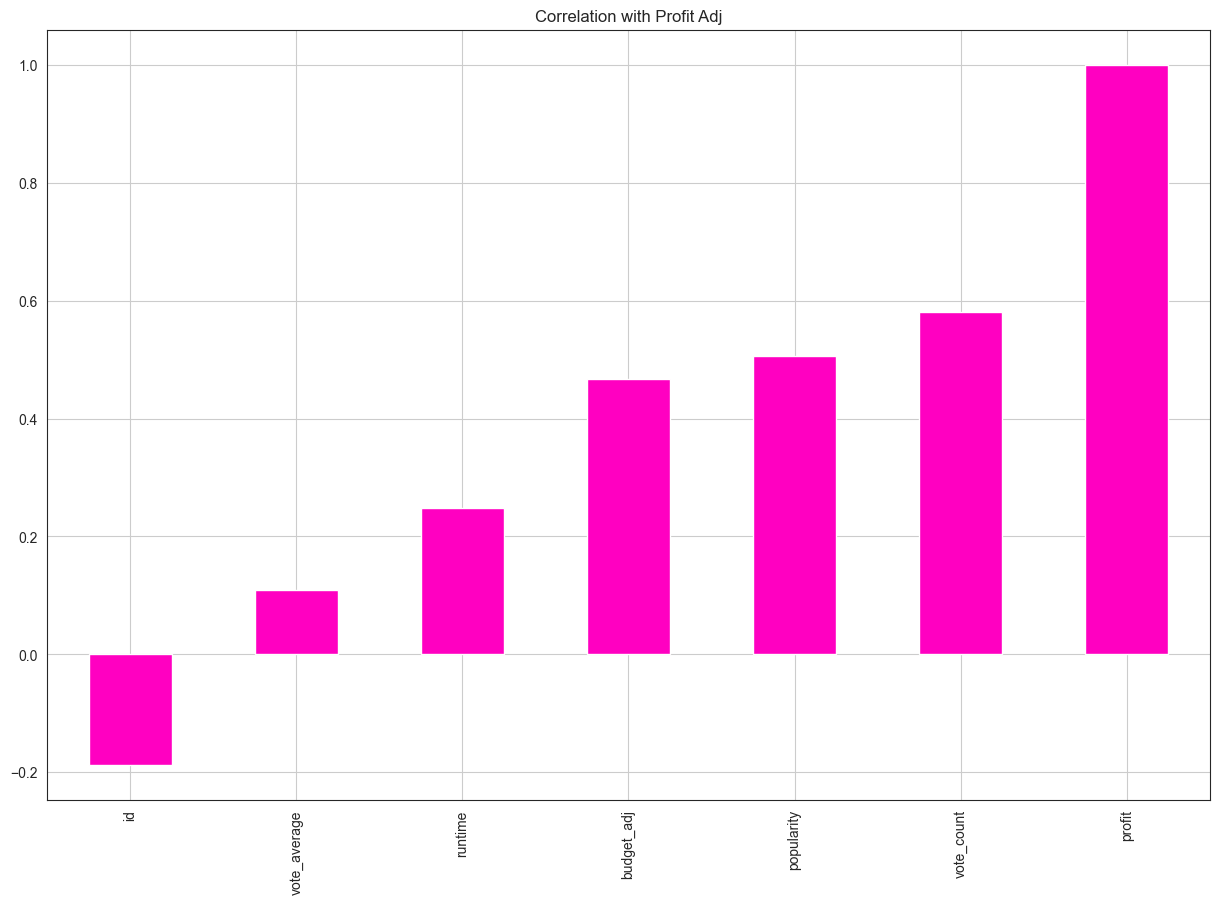

In [60]:
corr = df_movies.corr(numeric_only=True)['profit'].sort_values()
corr.plot.bar(figsize=(15,10), grid=True, rot=90, color='#ff00c1')
plt.title("Correlation with Profit Adj")
plt.show()

RESEARCH

1.1 GENRES VS PROFIT

1.1.1 single genre movie vs profit


In [61]:
## value count for single genre movie
df_movies_genres_single.genres.value_counts()

genres
Drama              638
Comedy             615
Horror             231
Documentary        185
Thriller            88
Action              57
Science Fiction     27
Animation           25
Adventure           22
Western             18
Music               16
Family              10
Fantasy              9
Romance              5
War                  5
Crime                3
Mystery              3
TV Movie             1
History              1
Name: count, dtype: int64

Getting the average profit made from single genres movies to know the categories that are most profitable


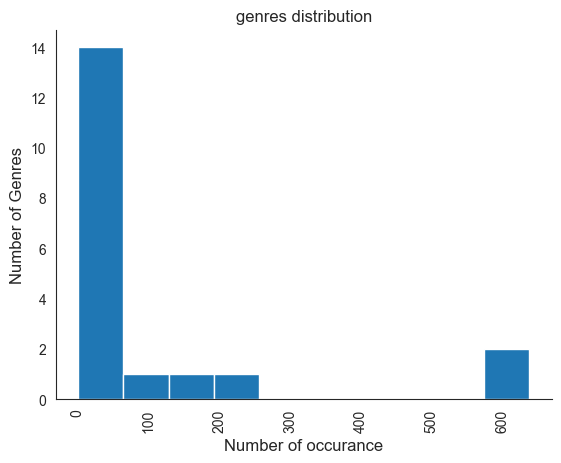

In [63]:
# visualizing the data distribution for single genres

df_movies_genres_single.genres.value_counts().plot(kind='hist')
plt.xlabel('Number of occurance',
           fontsize=12)
plt.ylabel('Number of Genres',
           fontsize=12)
plt.title("genres distribution",
          fontsize=12)
plt.xticks(rotation='vertical')
sns.despine()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Drama'),
  Text(3, 0, 'Thriller'),
  Text(4, 0, 'Horror'),
  Text(5, 0, 'Documentary'),
  Text(6, 0, 'Animation'),
  Text(7, 0, 'Crime'),
  Text(8, 0, 'Adventure'),
  Text(9, 0, 'Family'),
  Text(10, 0, 'Romance'),
  Text(11, 0, 'Science Fiction'),
  Text(12, 0, 'Music'),
  Text(13, 0, 'Western'),
  Text(14, 0, 'Fantasy'),
  Text(15, 0, 'War'),
  Text(16, 0, 'TV Movie'),
  Text(17, 0, 'History'),
  Text(18, 0, 'Mystery')])

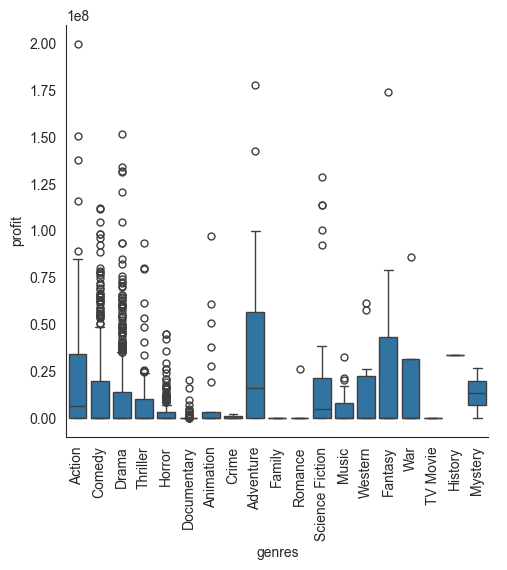

In [64]:
#visualizing the data distribution between genres and profit
#through box plot

plt.Figure(figsize=(20,40))
sns.catplot(x='genres',
            y='profit',
            kind='box',
            data=df_movies_genres_single)

plt.xticks(rotation='vertical')

In [69]:
#making the dataframe of all the averages per each genres of movies
#here we are using df_movies_genres_single dataframe

df_genres_single_avg = df_movies_genres_single.groupby('genres')['profit'].mean()
df_genres_single_avg

genres
Action             2.521412e+07
Adventure          3.610402e+07
Animation          1.194669e+07
Comedy             1.244585e+07
Crime              7.666660e+05
Documentary        4.258062e+05
Drama              1.113141e+07
Family             0.000000e+00
Fantasy            3.671205e+07
History            3.344239e+07
Horror             3.391022e+06
Music              5.984698e+06
Mystery            1.331239e+07
Romance            5.241787e+06
Science Fiction    2.525333e+07
TV Movie           0.000000e+00
Thriller           9.138535e+06
War                2.357518e+07
Western            1.247213e+07
Name: profit, dtype: float64

Visualizing how each genre fares in bar chart

Text(0, 0.5, 'average profit by each genre')

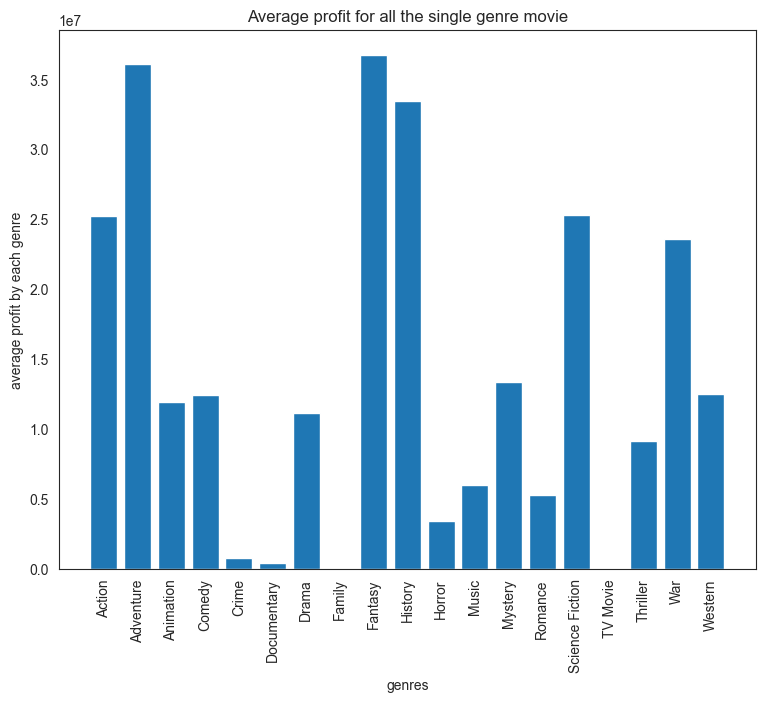

In [70]:
plt.subplots(figsize=(9,7))
plt.bar(x=df_genres_single_avg.index,
        height=df_genres_single_avg)
plt.title("Average profit for all the single genre movie")
plt.xlabel("genres")
plt.xticks(rotation='vertical')
plt.ylabel("average profit by each genre")

From the value counts history genres only had one entry. This does not represent the true picture. so, we would only be fousing on movies with more than 10 entries


In [71]:
##getting a series for more than 10 entries single genres

df_movies_genres_single_more_entries=df_movies_genres_single.genres.value_counts()[0:11]
df_movies_genres_single_more_entries

genres
Drama              638
Comedy             615
Horror             231
Documentary        185
Thriller            88
Action              57
Science Fiction     27
Animation           25
Adventure           22
Western             18
Music               16
Name: count, dtype: int64

In [72]:
#getting the index for more than 10 entries genres movies

df_movies_genres_single_more_entries.index

Index(['Drama', 'Comedy', 'Horror', 'Documentary', 'Thriller', 'Action',
       'Science Fiction', 'Animation', 'Adventure', 'Western', 'Music'],
      dtype='str', name='genres')

In [75]:
  #data frame for genres with more than 10 entries

genres_list = ['Drama', 'Comedy', 'Horror', 'Documentary', 'Thriller',
               'Action', 'Science Fiction', 'Animation', 'Adventure',
               'Western', 'Music']

df_movies_genres_single_2 = df_movies_genres_single[
    df_movies_genres_single['genres'].isin(genres_list)
]

df_movies_genres_single_2


,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,budget_adj,profit,release_day,release_month
25,177677,4.566713,Mission: Impossible - Rogue Nation,Tom Cruise|Jeremy Renner|Simon Pegg|Rebecca Fe...,Christopher McQuarrie,131,Action,Paramount Pictures|Skydance Productions|China ...,2349,7.1,489743512,137999939,<bound method DatetimeArray.day_name of <panda...,<bound method DatetimeArray.month_name of <pan...
26,214756,4.564549,Ted 2,Mark Wahlberg|Seth MacFarlane|Amanda Seyfried|...,Seth MacFarlane,115,Comedy,Universal Pictures|Media Rights Capital|Fuzzy ...,1666,6.3,136034457,62559972,<bound method DatetimeArray.day_name of <panda...,<bound method DatetimeArray.month_name of <pan...
51,257211,2.814802,The Intern,Robert De Niro|Anne Hathaway|Rene Russo|Anders...,Nancy Meyers,121,Comedy,Waverly Films|Warner Bros.,1255,7.1,146799433,32199985,<bound method DatetimeArray.day_name of <panda...,<bound method DatetimeArray.month_name of <pan...
55,295964,2.584264,Burnt,Bradley Cooper|Sienna Miller|Lily James|Alicia...,John Wells,100,Drama,Double Feature Films|PeaPie Films|3 Arts Enter...,631,6.3,15278196,18399991,<bound method DatetimeArray.day_name of <panda...,<bound method DatetimeArray.month_name of <pan...
58,306819,2.557859,The Danish Girl,Eddie Redmayne|Alicia Vikander|Matthias Schoen...,Tom Hooper,120,Drama,Pretty Pictures|Working Title Films|ArtÃ©mis P...,867,7.3,45256181,13799993,<bound method DatetimeArray.day_name of <panda...,<bound method DatetimeArray.month_name of <pan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10846,17102,0.212716,Dracula: Prince of Darkness,Christopher Lee|Barbara Shelley|Andrew Keir|Fr...,Terence Fisher,90,Horror,Seven Arts Productions|Hammer Film Productions,16,5.7,0,0,<bound method DatetimeArray.day_name of <panda...,<bound method DatetimeArray.month_name of <pan...
10852,37301,0.227220,A Big Hand for the Little Lady,Henry Fonda|Joanne Woodward|Jason Robards|Paul...,Fielder Cook,95,Western,Eden Productions Inc.,11,6.0,0,0,<bound method DatetimeArray.day_name of <panda...,<bound method DatetimeArray.month_name of <pan...
10860,5060,0.087034,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,Gerald Thomas,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,13,7.0,0,0,<bound method DatetimeArray.day_name of <panda...,<bound method DatetimeArray.month_name of <pan...
10861,21,0.080598,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,11,7.4,0,0,<bound method DatetimeArray.day_name of <panda...,<bound method DatetimeArray.month_name of <pan...


In [76]:
#getting average profit for genres with more than 10 entries

df_genres_single_avg_2=df_movies_genres_single_2.groupby('genres')['profit'].mean()
df_genres_single_avg_2


genres
Action             2.521412e+07
Adventure          3.610402e+07
Animation          1.194669e+07
Comedy             1.244585e+07
Documentary        4.258062e+05
Drama              1.113141e+07
Horror             3.391022e+06
Music              5.984698e+06
Science Fiction    2.525333e+07
Thriller           9.138535e+06
Western            1.247213e+07
Name: profit, dtype: float64

Visualizing the above results


Text(0, 0.5, 'Average profit by each genres')

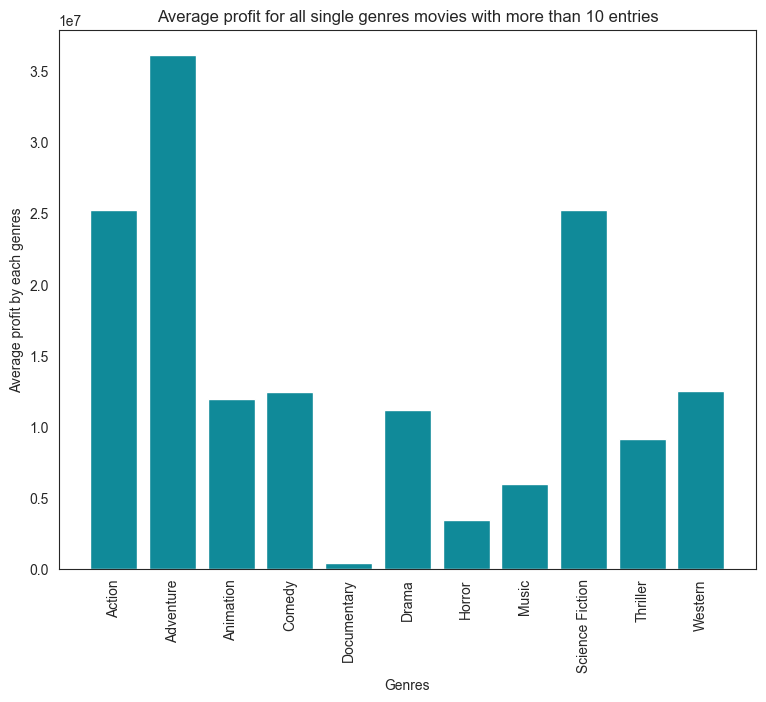

In [77]:
plt.subplots(figsize=(9,7))
plt.bar(x=df_genres_single_avg_2.index,
        height=df_genres_single_avg_2,
        color='#108A99')
plt.title("Average profit for all single genres movies with more than 10 entries")
plt.xlabel("Genres")
plt.xticks(rotation='vertical')
plt.ylabel("Average profit by each genres")

Since the genres with highest profit per movie in this category is mroe than 39M, we wannt those genres of movies that more than 10M profit per movie in this category

In [78]:
## Get genres that thier profit per movie is more than 10M in this category

df_genres_single_avg_2_10M=df_genres_single_avg_2>10000000

df_genres_single_avg_2_10M

genres
Action              True
Adventure           True
Animation           True
Comedy              True
Documentary        False
Drama               True
Horror             False
Music              False
Science Fiction     True
Thriller           False
Western             True
Name: profit, dtype: bool

HYbrid genre movies vs profit

ho do genres that appear as joint genres in movies fare in relation profit


In [79]:
## value counts for hybrid genrs movies

df_movies_genres_hybrid_sep.genres.value_counts()

genres
Drama              3726
Comedy             2818
Thriller           2658
Action             2176
Romance            1565
Adventure          1362
Crime              1296
Horror             1295
Science Fiction    1107
Family             1085
Fantasy             830
Mystery             770
Animation           590
Music               323
History             305
War                 253
Western             142
Documentary         132
TV Movie            131
Foreign             120
Name: count, dtype: int64